## 1. 导入数据

In [1]:
# 先导入pandas库
import pandas as pd
# 读入数据。有两个数据集：训练数据集和测试数据集，假设下载后存放在当前目录下
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

In [2]:
# 合并数据集，方便同时对两个数据集进行相同的预处理
fullData = trainData.append(testData, ignore_index = True)

C:\Users\Qiuyue\Miniconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


## 2. 查看数据信息

In [121]:
# 显示前5行数据
fullData.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [122]:
# 显示行数和列数
print('训练数据集:', trainData.shape, '测试数据集:', testData.shape)
print ('合并后的数据集:', fullData.shape)

训练数据集: (891, 12) 测试数据集: (418, 11)
合并后的数据集: (1309, 12)


In [123]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [124]:
fullData.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


## 3. 探索性数据分析

### 3.1 单变量可视化

In [125]:
trainData["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [126]:
trainData["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [127]:
import seaborn as sns
%matplotlib inline

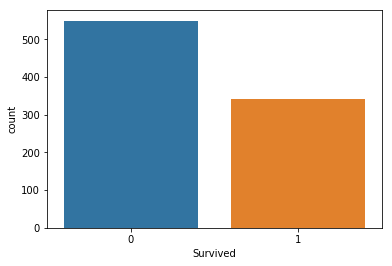

In [128]:
sns.countplot(trainData.Survived)

C:\Users\Qiuyue\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Qiuyue\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Qiuyue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


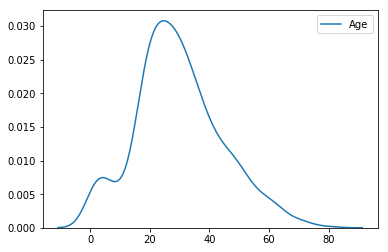

In [129]:
sns.kdeplot(trainData.Age)

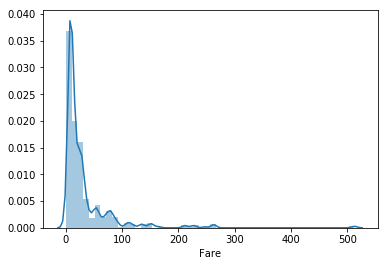

In [130]:
sns.distplot(trainData.Fare)

### 3.2 两个变量的可视化

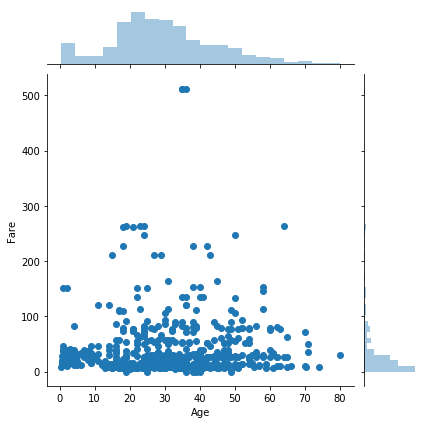

In [131]:
sns.jointplot(x="Age",y="Fare",data=trainData)

C:\Users\Qiuyue\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


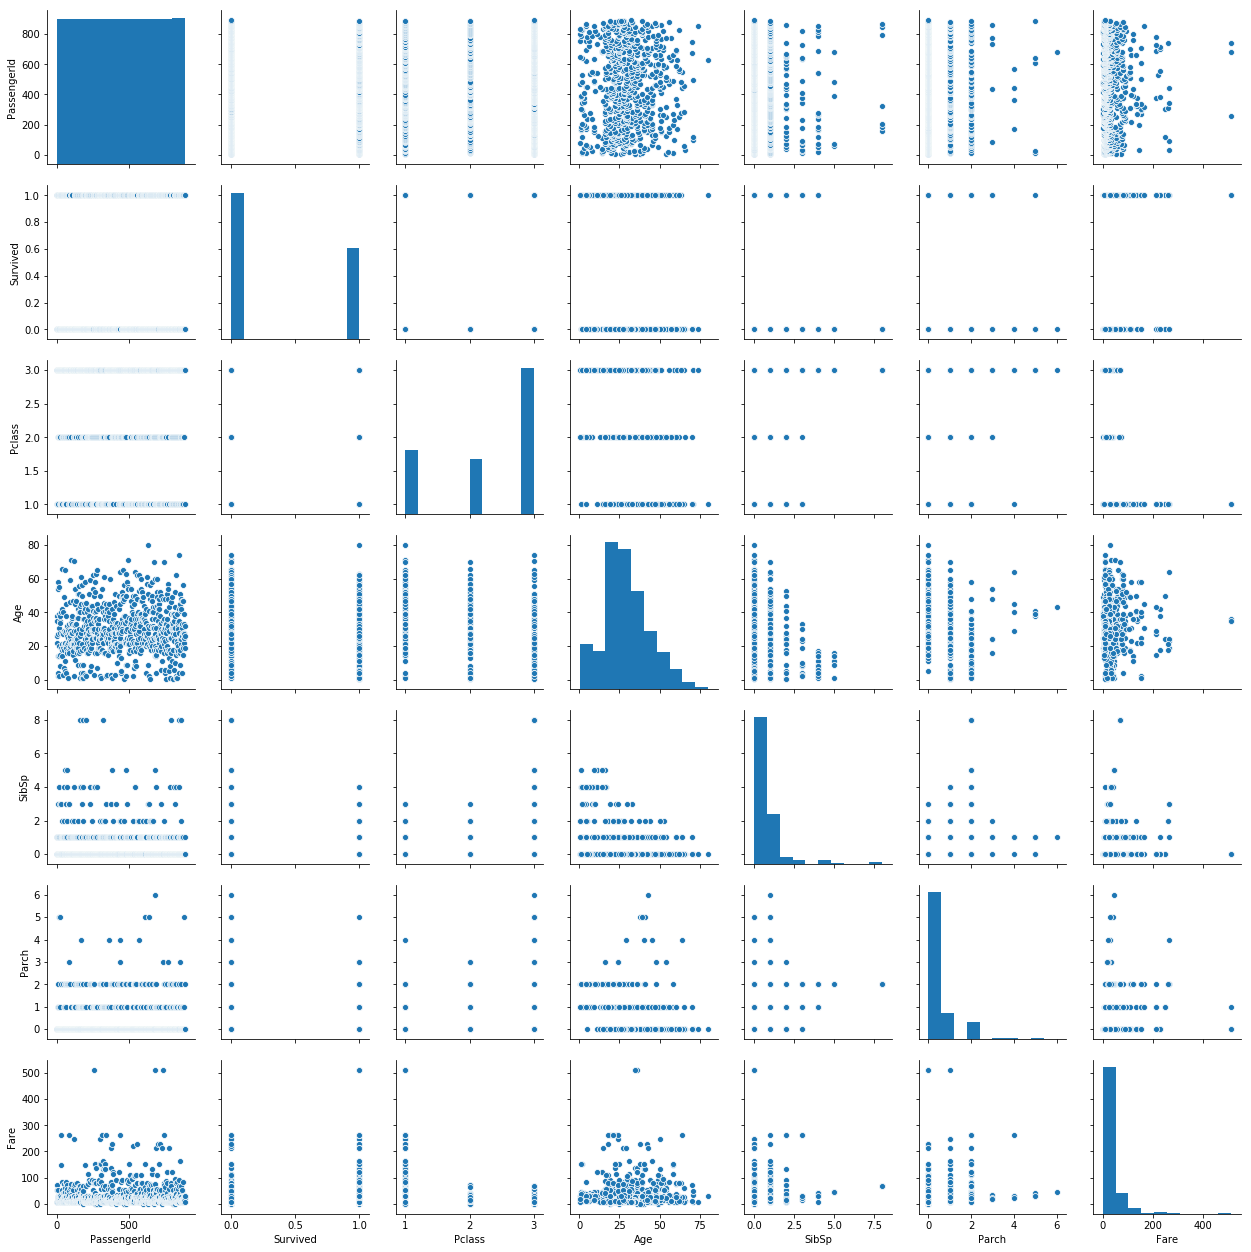

In [132]:
sns.pairplot(trainData)

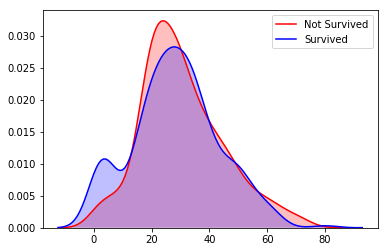

In [133]:
sns.kdeplot(trainData["Age"][trainData.Survived==0], color="Red", shade=True, label='Not Survived')
sns.kdeplot(trainData["Age"][trainData.Survived==1], color="Blue", shade=True, label='Survived')

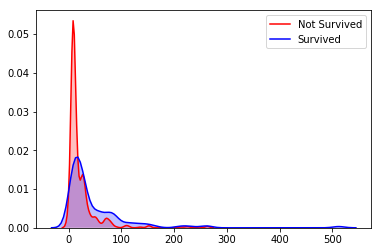

In [134]:
sns.kdeplot(trainData["Fare"][trainData.Survived==0], color="Red", shade=True, label='Not Survived')
sns.kdeplot(trainData["Fare"][trainData.Survived==1], color="Blue", shade=True, label='Survived')

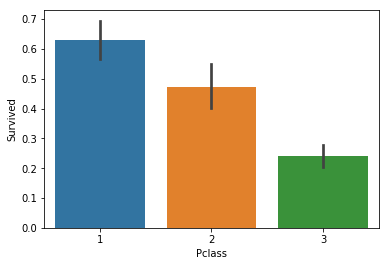

In [135]:
sns.barplot(x='Pclass',y='Survived',data=trainData)

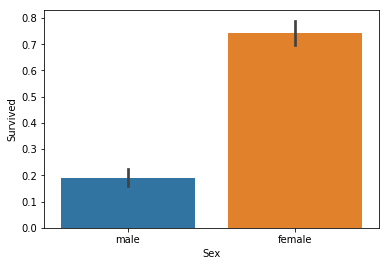

In [136]:
sns.barplot(x='Sex',y='Survived',data=trainData)

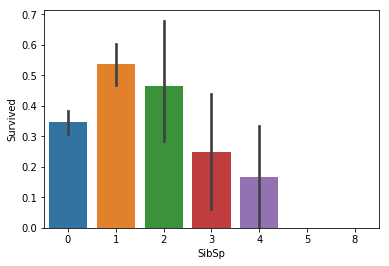

In [137]:
sns.barplot(x='SibSp',y='Survived',data=trainData)

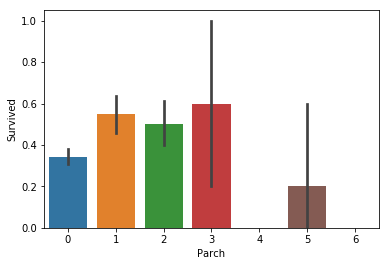

In [138]:
sns.barplot(x='Parch',y='Survived',data=trainData)

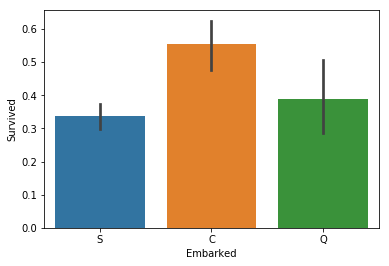

In [139]:
sns.barplot(x='Embarked',y='Survived',data=trainData)

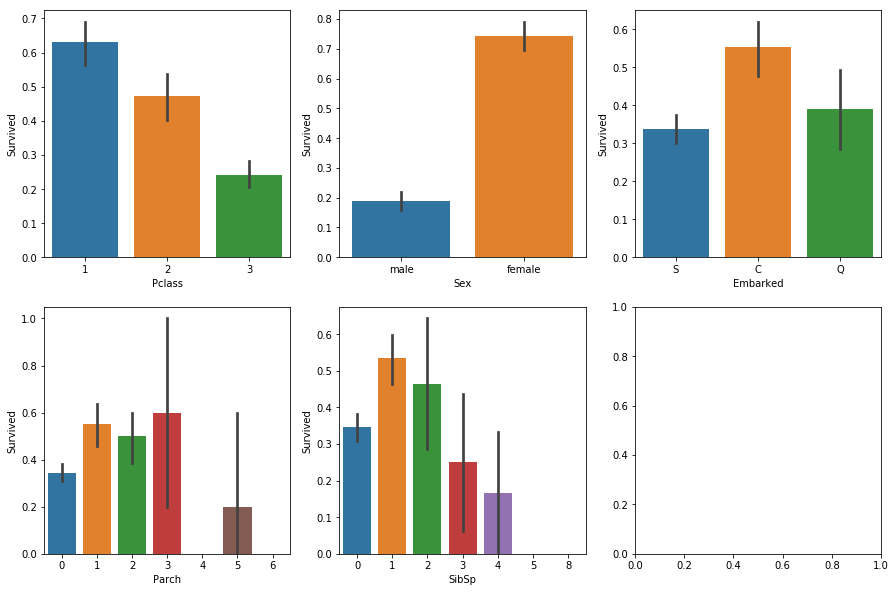

In [140]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,3,figsize=(15,10))

sns.barplot(x='Pclass',y='Survived',data=trainData,ax=axes[0,0])
sns.barplot(x='Sex',y='Survived',data=trainData,ax=axes[0,1])
sns.barplot(x='SibSp',y='Survived',data=trainData,ax=axes[1,1])
sns.barplot(x='Parch',y='Survived',data=trainData,ax=axes[1,0])
sns.barplot(x='Embarked',y='Survived',data=trainData,ax=axes[0,2])

### 3.3 两个以上变量的可视化

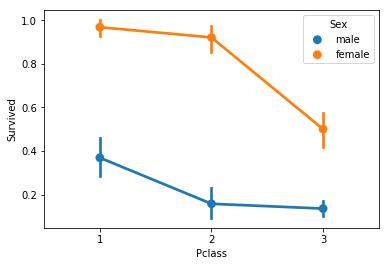

In [141]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=trainData)

## 4. 数据预处理

### 4.1 异常值处理

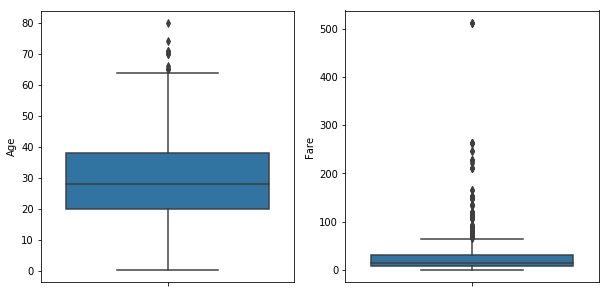

In [142]:
fig,axes = plt.subplots(1, 2, figsize=(10,5))   
sns.boxplot(y='Age', data=trainData, ax=axes[0])
sns.boxplot(y='Fare', data=trainData, ax=axes[1])

### 4.2 缺失值处理

In [143]:
fullData.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [144]:
# 用一个特定值’U’填充Cabin列的缺失值
fullData. Cabin.fillna('U', inplace=True)

In [145]:
# 用均值填充Age列的缺失值
fullData. Age.fillna(fullData.Age.mean(), inplace=True)

In [146]:
# 用中位数填充Fare列的缺失值
fullData. Fare.fillna(fullData.Fare.median(), inplace=True)

In [147]:
# 先用value_counts查看Embarked列中出现最频繁的值
fullData.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [148]:
# 用最频繁的值’S’填充Embarked列的缺失值
fullData.Embarked.fillna('S', inplace=True)

In [149]:
#from sklearn.ensemble import RandomForestRegressor

##choose training data to predict age
#age_df = trainData[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
#age_df_notnull = age_df.loc[(trainData['Age'].notnull())]
#age_df_isnull = age_df.loc[(trainData['Age'].isnull())]
#X = age_df_notnull.values[:,1:]
#Y = age_df_notnull.values[:,0]
## use RandomForestRegression to train data
#RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
#RFR.fit(X,Y)
#predictAges = RFR.predict(age_df_isnull.values[:,1:])
#trainData.loc[trainData['Age'].isnull(), ['Age']]= predictAges

### 4.3 特征编码转换

类别数值型：Pclass，SibSp，Parch

类别非数值型：Sex，Embarked

连续数值型：Age，Fare

连续非数值型：Name，Cabin，Ticket

In [150]:
fullData["Sex"] = fullData["Sex"].map({'male':1, 'female':0})

In [151]:
fullData.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [152]:
# 将Embarked列的值转换为独热编码
embDf = pd.get_dummies(fullData.Embarked, prefix='Embarked', drop_first=True)
# 将独热编码后的多个列拼接到原数据中
fullData = pd.concat([fullData, embDf], axis=1)

In [153]:
fullData.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_Q,Embarked_S
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0,0
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,1
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,1


In [154]:
# 将Pclass列的值转换为独热编码
pclassDf = pd.get_dummies(fullData.Pclass, prefix='Pclass', drop_first=True)
# 将独热编码后的多个列拼接到原数据中
fullData = pd.concat([fullData, pclassDf], axis=1)

In [155]:
fullData.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0,0,0,0
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,1,0,0
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,1,0,1


### 4.4 特征值缩放

## 5. 特征工程

### 5.1 特征创建

In [156]:
# 从每个乘客的姓名中提取其称谓
fullData['Title'] = fullData['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
fullData['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Mme               1
Don               1
Sir               1
Jonkheer          1
Dona              1
Lady              1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [157]:
# 姓名中称谓字符串与所定义称谓类别的映射关系
title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
# 使用map函数将各种称谓转换成其相应的称谓类别
fullData['Title'] = fullData['Title'].map(title_mapDict)

#使用get_dummies函数进行独热编码
titleDf = pd.get_dummies(fullData['Title'], prefix='Title', drop_first=True)
# 将独热编码后的多个列，即embarked_d，拼接到原数据中
fullData = pd.concat([fullData, titleDf], axis=1)

In [158]:
fullData.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,1,0,1,Mr,0,1,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0,0,0,0,Mrs,0,0,1,0,0
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0,1,0,1,Miss,1,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0,1,0,0,Mrs,0,0,1,0,0
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,0,1,0,1,Mr,0,1,0,0,0


In [159]:
# 将Cabin列值映射为其首字母的值
fullData['Cabin'] = fullData['Cabin'].map(lambda x : x[0])

In [160]:
#使用get_dummies函数进行独热编码
cabinDf = pd.get_dummies(fullData['Cabin'], prefix='Cabin', drop_first=True)
# 将独热编码后的多个列，即embarked_d，拼接到原数据中
fullData = pd.concat([fullData, cabinDf], axis=1)

In [161]:
fullData.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title_Officer,Title_Royalty,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,0,0,0,0,0,0,0,0,0,1


In [175]:
# 创建新的特征Family_Size
fullData['FamilySize'] = fullData['Parch'] + fullData['SibSp'] + 1
# 创建三个新的二值特征：Family_Single, Family_Small, Family_Large
fullData['Family_Single'] = fullData ['FamilySize'].map(lambda s: 1 if s==1 else 0)
fullData['Family_Small'] = fullData['FamilySize'].map(lambda s: 1 if 1<s<5 else 0)
fullData['Family_Large'] = fullData['FamilySize'].map(lambda s: 1 if s>=5 else 0)

In [176]:
fullData.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,0,0,0,0,1,2,0,1,0
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0,0,0,0,0,0,2,0,1,0
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0,0,0,0,0,1,1,1,0,0
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0,0,0,0,0,0,2,0,1,0
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,0,0,0,0,0,1,1,1,0,0


In [177]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 34 columns):
Age              1309 non-null float64
Cabin            1309 non-null object
Embarked         1309 non-null object
Fare             1309 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null int64
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Pclass_2         1309 non-null uint8
Pclass_3         1309 non-null uint8
Title            1309 non-null object
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null u

In [178]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 5.2 特征选择

In [193]:
# 计算所有数值型特征列两两之间的线性相关性
corrDf = fullData.corr()

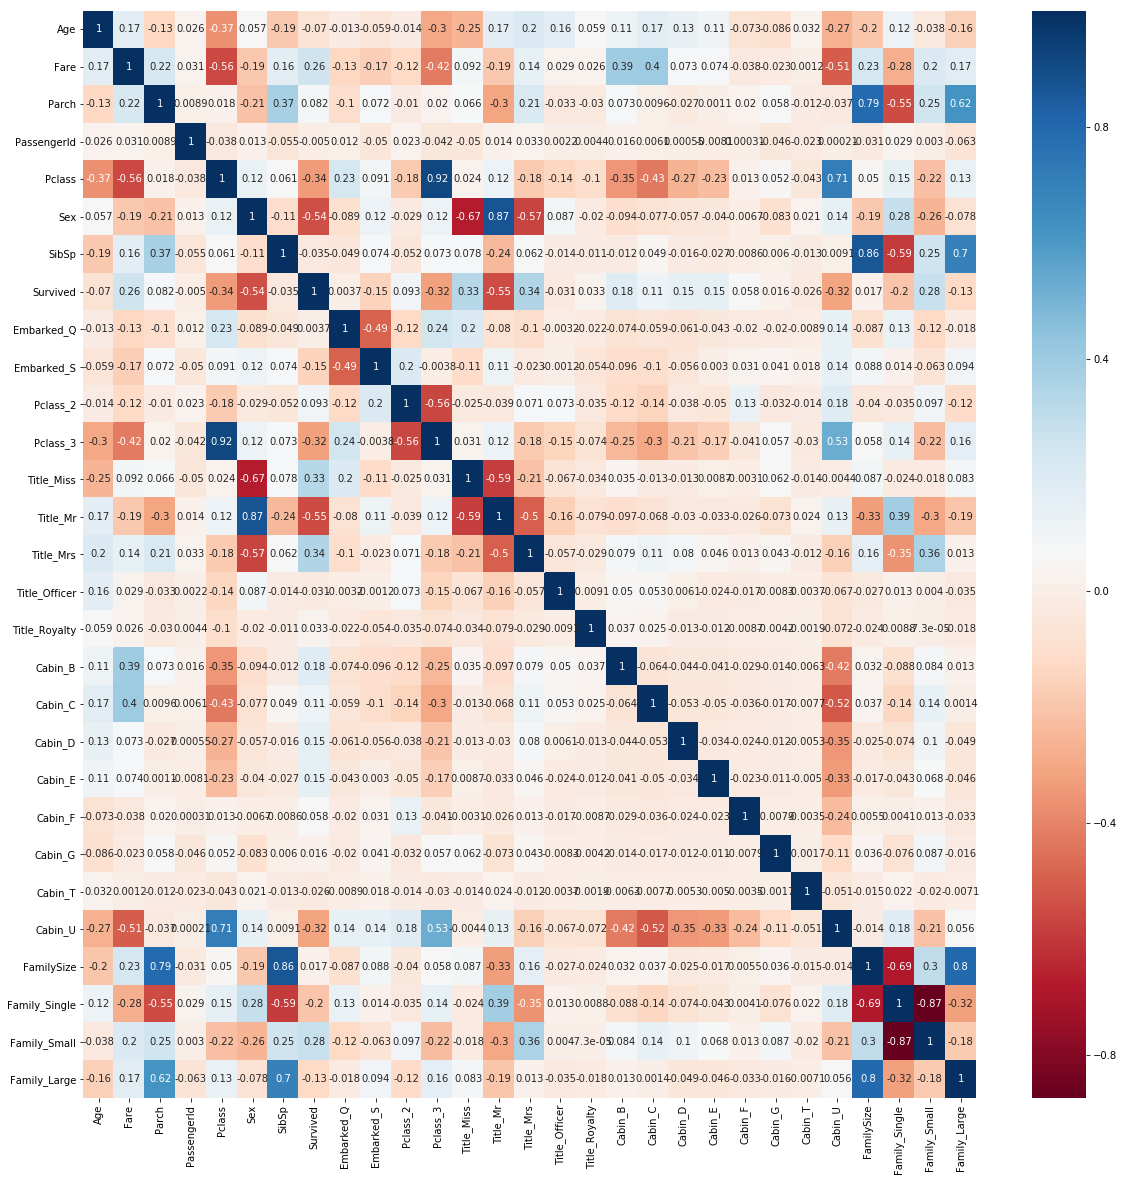

In [194]:
# 可视化相关系数矩阵
plt.figure(figsize=(20,20))
sns.heatmap(corrDf,cmap=plt.cm.RdBu,linecolor='white',annot=True)

In [198]:
# 查看每个特征与Survived的相关系数，并按绝对值的降序排列
corrDf['Survived'].map(abs).sort_values(ascending =False)

Survived         1.000000
Title_Mr         0.549199
Sex              0.543351
Title_Mrs        0.344935
Pclass           0.338481
Title_Miss       0.332795
Pclass_3         0.322308
Cabin_U          0.316912
Family_Small     0.279855
Fare             0.257307
Family_Single    0.203367
Cabin_B          0.175095
Cabin_D          0.150716
Embarked_S       0.149683
Cabin_E          0.145321
Family_Large     0.125147
Cabin_C          0.114652
Pclass_2         0.093349
Parch            0.081629
Age              0.070323
Cabin_F          0.057935
SibSp            0.035322
Title_Royalty    0.033391
Title_Officer    0.031316
Cabin_T          0.026456
FamilySize       0.016639
Cabin_G          0.016040
PassengerId      0.005007
Embarked_Q       0.003650
Name: Survived, dtype: float64

In [212]:
# 筛选出最终输入模型的特征列和目标列
cols = corrDf['Survived'][abs(corrDf['Survived'])>0.02].index
fullNew = fullData[cols].drop(columns=['Pclass_2','Pclass_3','Parch','SibSp'])

In [213]:
fullNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
Age              1309 non-null float64
Fare             1309 non-null float64
Pclass           1309 non-null int64
Sex              1309 non-null int64
Survived         891 non-null float64
Embarked_S       1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_U          1309 non-null uint8
Family_Single    1309 non-null int64
Family_Small     1309 non-null int64
Family_Large     1309 non-null int64
dtypes: float64(3), int64(5), uint8(13)
memory usage: 98.5 KB


In [217]:
# 拆分出原来的训练数据集和测试数据集
train_X = fullNew[:891].drop(columns=['Survived'])
train_y = fullNew[:891].Survived
test_X = fullNew[891:].drop(columns=['Survived'])
train_X.shape, train_y.shape, test_X.shape

((891, 20), (891,), (418, 20))

## 6. 基本模型构建

In [223]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# 导入各个分类模型类
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [224]:
# 用5折交叉验证一次评估四种模型的效果
models=[LogisticRegression(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()]
names=['LR: ','SVM: ','RF: ','GB: ']
for name, model in zip(names, models):
    score = cross_val_score(model, train_X, train_y, cv=5)
    print(name, score.mean(), score)

C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR:  0.823825842164674 [0.82122905 0.82122905 0.80337079 0.8258427  0.84745763]
SVM:  0.729643834800288 [0.6424581  0.75418994 0.71348315 0.75842697 0.77966102]


C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

RF:  0.8103803585164411 [0.81005587 0.79888268 0.8258427  0.76966292 0.84745763]
GB:  0.8260539891842896 [0.82122905 0.82122905 0.83146067 0.8258427  0.83050847]


In [259]:
# 逻辑回归模型
param_grid={'C':[0.5,1.0,1.1,1.2,1.3,1.5], 'penalty':['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(train_X, train_y)
grid_search.best_params_, grid_search.best_score_

C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

({'C': 1.2, 'penalty': 'l1'}, 0.8271604938271605)

In [260]:
# 用训练好的模型对测试数据进行预测
test_y = grid_search.predict(test_X).astype(int)
passenger_id = fullData[891:].PassengerId
# 将预测结果按所要求的格式，准备成一个用于提交的csv文件
submission = pd.DataFrame({'PassengerId': passenger_id , 'Survived': test_y})
submission.to_csv('titanic_lr.csv', index=False)

In [261]:
# 支持向量机模型
param_grid={'C':[5,6,7,8],'gamma':[0.005,0.01,0.015,0.02]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(train_X, train_y)
grid_search.best_params_, grid_search.best_score_

({'C': 7, 'gamma': 0.01}, 0.7845117845117845)

In [262]:
# 用训练好的模型对测试数据进行预测
test_y = grid_search.predict(test_X).astype(int)
passenger_id = fullData[891:].PassengerId
# 将预测结果按所要求的格式，准备成一个用于提交的csv文件
submission = pd.DataFrame({'PassengerId': passenger_id , 'Survived': test_y})
submission.to_csv('titanic_svc.csv', index=False)

In [263]:
# 随机森林模型
param_grid={'n_estimators':[450,480,485,490],'max_depth':[7,8,9,10]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(train_X, train_y)
grid_search.best_params_, grid_search.best_score_

({'max_depth': 8, 'n_estimators': 485}, 0.8395061728395061)

In [264]:
# 用训练好的模型对测试数据进行预测
test_y = grid_search.predict(test_X).astype(int)
passenger_id = fullData[891:].PassengerId
# 将预测结果按所要求的格式，准备成一个用于提交的csv文件
submission = pd.DataFrame({'PassengerId': passenger_id , 'Survived': test_y})
submission.to_csv('titanic_rf.csv', index=False)

In [275]:
# 梯度提升树模型
param_grid={'n_estimators':[100,110,120,130],'learning_rate':[0.09,0.1,0.11,0.12],'max_depth':[2,3,4,5]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(train_X, train_y)
grid_search.best_params_, grid_search.best_score_

({'learning_rate': 0.11, 'max_depth': 4, 'n_estimators': 110},
 0.8439955106621774)

In [276]:
# 用训练好的模型对测试数据进行预测
test_y = grid_search.predict(test_X).astype(int)
passenger_id = fullData[891:].PassengerId
# 将预测结果按所要求的格式，准备成一个用于提交的csv文件
submission = pd.DataFrame({'PassengerId': passenger_id , 'Survived': test_y})
submission.to_csv('titanic_gbc.csv', index=False)

## 7. 模型集成

In [254]:
# 用多数投票模型集成前面四个最佳模型 
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(C=1.2, penalty='l1')
clf2 = SVC(C=7, gamma=0.01)
clf3 = RandomForestClassifier(n_estimators=480, max_depth=8)
clf4 = GradientBoostingClassifier(n_estimators=110, learning_rate=0.1, max_depth=4)

vclf = VotingClassifier(estimators=[('LR',clf1),('SVM',clf2),('RF',clf3),('GB',clf4)])

score = cross_val_score(vclf, train_X, train_y, cv=5)
print(score.mean(), score)

C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.8395122397542792 [0.84357542 0.83798883 0.84269663 0.8258427  0.84745763]


## 8. 模型使用

In [258]:
# 用训练好的模型对测试数据进行预测
test_y = vclf.fit(train_X, train_y).predict(test_X).astype(int)
passenger_id = fullData[891:].PassengerId
# 将预测结果按所要求的格式，准备成一个用于提交的csv文件
submission = pd.DataFrame({'PassengerId': passenger_id , 'Survived': test_y})
submission.to_csv('titanic_pred.csv', index=False)

C:\Users\Qiuyue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
